# Regressions

Regressions are used to explain the relationship between one dependent variable and one or more independent variables. In the simplest form linear relationship is expressed as $$Y=w_0+wX$$ 
where $Y$ - dependent variable, $X$ - independent variable, $w_0$ - intercept and $w$ - coefficient (slope) for the independent variable $X$.

A more complex relationship might be expressed as $$Y=w_0+w_1{X_1}+w_2{X_2}+w_3{X_3}$$
where $Y$ - dependant variable, $X_1, X_2, X_3$ - independent variables, $w_0$ - intercept, $w_1, w_2, w_3$ - coefficients.

The overall idea of a regression is to examine two things:
- Does a set of predictor variables do a good job in predicting an outcome variable (dependent variable)?
- Which variables (independent variables) in particular are significant predictors of the outcome variable, and in what way do they impact the outcome variable?

Methods differ on the number of independent variables and the type of relationship:
* Linear regression looks for a linear relationship
 - Univariate linear regression: only one independent variable
 - Multivariate linear regression: multiple independent variables
* Non-linear regressions predict outcome variables when there is no linear relationship
 - Polynomial, exponential, logarithmic
 - Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor

## Linear Regressions

This demo will demonstrate how to do a univariate linear regression and how to measure its goodness-for-fit.

Our dataset will consist of two columns, SAT and GPA scores, and our objective will be to find the best fitting line that explains the relationship between SAT and GPA scores.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('./demo-datasets/sat_gpa.csv')

In [5]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [6]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
SAT    84 non-null int64
GPA    84 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


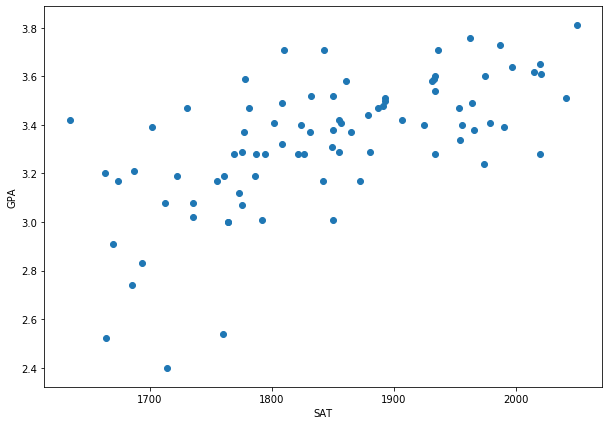

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter('SAT', 'GPA', data=data)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

By looking at the scatter plot, we definitely see that there is some linear relationship between SAT score and GPA score. Let's run a linear regression and see how well does SAT explain the variance of GPA.

In the regression, SAT will be independent variable, and GPA will be dependent variables.

Our objective is to find the line that _best_ fits all observations. But how can we define the _best_ fitting line?

## Mean Squared Error

A very common metric used to assess the fitness of a line is _Mean Squared Error (MSE)_.

$$MSE=\frac{1}{2n}\sum_{i=1}^{n}{(y_i-\hat{y_i})^2}$$
where $y_i$ - observed Y value and $\hat{y_i}$ - predicted value, and $\hat{y_i}=w_0+w_1{x_i}$

![Errors](./images/errors-graph.png)

So, the objective of regression is to find such _intercept_, $w_0$, and _slope_, $w_1$, that minimizes MSE.

## Cost Functions and Gradient Descent

One way we can find the optimal _intercept_ and _slope_ is by using _gradient descent_ technique. In order to apply the technique we need to define a _cost function_.

$$J(w_0, w_1)=\frac{1}{2n}\sum_{i=1}^{n}{(y_i-\hat{y_i})^2}$$
Remember that $\hat{y_i}=w_0+w_1{x_i}$

At this moment let's assume that $w_0=0$. In that case, $\hat{y_i}=w_1{x_i}$ and cost function is only a function of $w_1$. $$J(w_1)=\frac{1}{2n}\sum_{i=1}^{n}{(y_i-\hat{y_i})^2}$$

In that case the relationship between $w_1$ and $J$ can be represented on 2-D graph.

![Cost Function & Gradient Descent](./images/costfunction_gradientdescent.png)

Gradient descent algorithm starts with any random $w_1$. Then we find the gradient of the cost function, $J$, at point $w_1$ by calculating first order derivative of the cost function with respect to $w_1$.
$\frac{\partial J}{\partial w_1}=\frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat{y_i})x_i}$

Using cost function's gradient, a new $w_1$ is calculated which will bring $w_1$ closer to the point, where cost function is at its minimum. Instead of using the full gradient, $\alpha$ (learning rate) is used scale it; $\alpha<1$.

$$w_1^{(new)}=w_1-\alpha\frac{\partial J}{\partial w_1}=w_1-\alpha\frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat{y_i})x_i}$$

The process is repeated until the gradient becomes 0 (or very close to 0).

Now let's reintroduce $w_0$. Finding $w_0$ value that minimizes cost function, will follow the same gradient descent approach, except we will have to calculate first order partial derivative of the cost function with respect to $w_0$. $\frac{\partial J}{\partial w_0}=\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})$

Similar to $w_1$, $w_0$ is initially initialized with a random value, and during each iteration $w_0$ is updated by using scaled gradient.

$$w_0^{new}=w_0-\alpha\frac{\partial J}{\partial w_0}=w_0-\alpha\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})$$

### Learning Rate

Keep in mind that by using small learning rate, gradient descent will require many iterations to converge to the minimum, whereas by using large learning rate, gradient descent might overshoot the minimum and would never converge.

![Descent Learning Rate](./images/descent-learning-rate.png)

## Linear Regression with __sklearn__

In [9]:
lr = LinearRegression()

We need to reshape our 1D arrays into 2D arrays with _n_ x _m_ format, where _n_ is the number of rows and _m_ is the number of columns. 

In [10]:
x = data['SAT'].values.reshape(-1, 1)

In [11]:
y = data['GPA'].values.reshape(-1, 1)

In [12]:
# fit() function calculates slope and interecept for the best fitting line
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# Get coefficients for all independent variables
lr.coef_

array([[0.00165569]])

In [14]:
# Get coefficient for intercept
lr.intercept_

array([0.2750403])

In [15]:
print('Best fit line: Y = ' + str(round(lr.intercept_[0], 3)) + ' + ' + str(round(lr.coef_[0][0], 5)) + 'X')

Best fit line: Y = 0.275 + 0.00166X


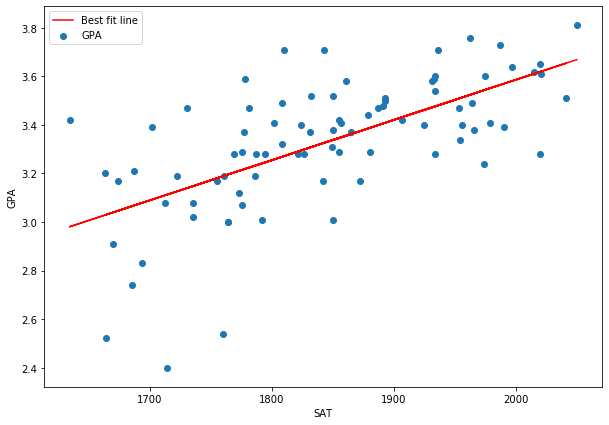

In [16]:
plt.figure(figsize=(10, 7))

# draw a scatter plot of observed values
plt.scatter('SAT', 'GPA', data=data)
plt.xlabel('SAT')
plt.ylabel('GPA')

# draw a regression line
plt.plot(x, lr.predict(x), c='red')
plt.legend(['Best fit line', 'GPA'])
plt.show()

Now let's check how well does SAT score explain the variance of GPA.

$R^2$ (coefficient of determination) is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.

$$R^2=1-\frac{SS_{residuals}}{SS_{total}}$$

$$SS_{residuals}=\sum_i (y_i - \hat{y_i})^2$$

$$SS_{total}=\sum_i (y_i - \bar{y_i})^2$$

$$\bar{y_i}=\frac{1}{n}\sum_i^n y_i$$

In [17]:
# Get R-squared
lr.score(x, y)

0.40600391479679765